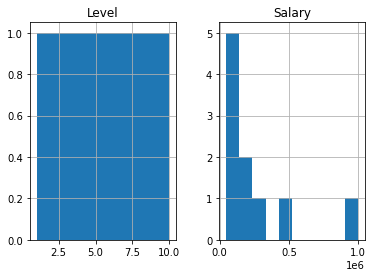

In [2]:
import pandas as pd
url='Position_Salaries.csv'
data=pd.read_csv(url)
import matplotlib.pyplot as plt
data.hist()
plt.show()

In [3]:
correlation=data.corr()
print(correlation)

           Level    Salary
Level   1.000000  0.817949
Salary  0.817949  1.000000


<Axes: >

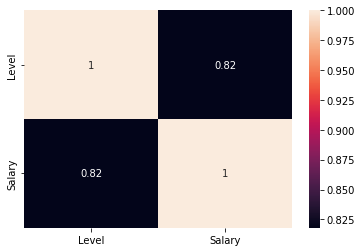

In [4]:
import seaborn as sns
sns.heatmap(correlation,annot=True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Level', ylabel='Salary'>

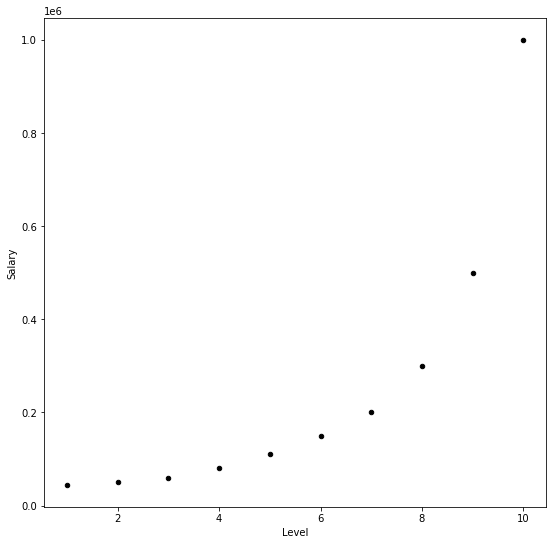

In [5]:
data.plot(kind='scatter',x='Level',y='Salary',figsize=(9,9),color='black')

In [6]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['Level']),y=data['Salary'])
print(model.intercept_)
print(model.coef_)
model.score(X=pd.DataFrame(data['Level']),y=data['Salary'])

-195333.33333333337
[80878.78787879]


0.6690412331929895

In [11]:
model=linear_model.LinearRegression()

model.fit(X=pd.DataFrame([data['Level'],data['Level']**2,data['Level']**3]).T,y=data['Salary'])
print('Intercept of model:',model.intercept_)
print('Coefient of model:',model.coef_)
print('Độ chính xác của mô hình:',model.score(X=pd.DataFrame([data['Level'],data['Level']**2,data['Level']**3]).T,y=data['Salary']))

Intercept of model: -121333.33333333873
Coefient of model: [180664.33566434 -48548.95104895   4120.04662005]
Độ chính xác của mô hình: 0.9812097727913366


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


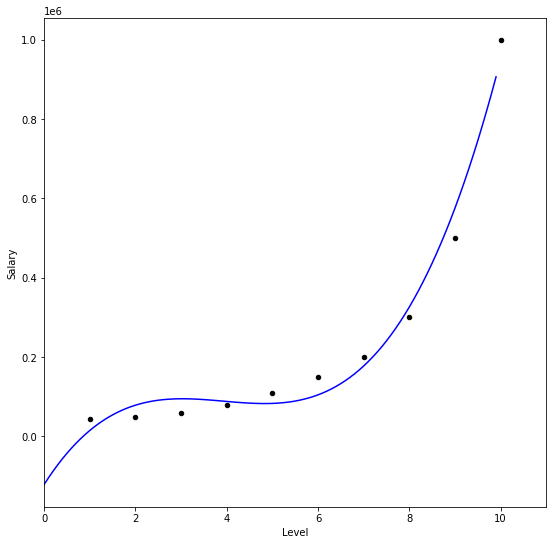

In [13]:
import numpy as np
range=np.arange(0,10,0.1)
data.plot(kind='scatter',x='Level',y='Salary',figsize=(9,9),color='black',xlim=(0,11))
predictor=pd.DataFrame([range,range**2,range**3]).T
y_pred=model.predict(X=predictor)
plt.plot(range,y_pred,color='blue')